# Método de shooting

El método de shooting consiste en sustuir el problema de valor de frontera 

\begin{equation}
y'' = f(x, y, y'), ~~~~~ y(a) = \alpha, ~~~~  y(b) = \beta. \label{eq:ecdiff3}
\end{equation}

por el problemas de valor inicial.

\begin{equation}
y'' = f(x, y, y'), ~~~~~ y(a) = \alpha, ~~~~  y'(a) = u. \label{eq:ecdiff4}
\end{equation}

Como la solución del valor inicial depende de $u$, tenemos que resolver:

\begin{equation}
y(b)= \theta(u). \label{eq:ecdiff5}
\end{equation}

Por lo que $u$ es la raíz:

\begin{equation}
r(u)= \theta(u)-\beta=0. \label{eq:ecdiff6}
\end{equation}

que se puede resolver por cualquiera de los métodos vistos en clase (sección 2).

1. **Interación simple y bisección:** Se requiere evaluar muchas veces $\theta(u)$
2. **Interpolación lineal (Regula falsi) y Ridder:** Mejor convergencia
3. **Newton-Raphson:** Se requiere conocer la derivada $d\theta/du$

* Si la ecuación diferencial es no lineal el mejor método para obtener las raices es el de Ridder

* Si la ecuación diferencial es lineal el mejor método para obtener las raices es el de interpolación lineal


# Ejemplo 1: Método de shooting

Resolver el problema de frontera:

\begin{equation}
y'' + 3y y'=0 ~~~~~ y(0) = 0, ~~~~  y(2) = 1
\end{equation}

La ecuación equivalente de primer orden es:

\begin{eqnarray}
\mathbf{y^{\prime}} = \begin{bmatrix}
y^{\prime}_0 \\
y^{\prime}_1 
\end{bmatrix}= \begin{bmatrix}
y_1 \\
-3y_0 y_1 
\end{bmatrix}
\end{eqnarray}

con condiciones de frontera:

\begin{equation}
y_0(0) = 0, ~~~~~ y_0 (2) = 1
\end{equation}

![DIV](fig/ej1.jpg)


**Suposiciones:**
1. $y$ es una función suave en el intervalo $0\le x \le 2$
2. $y'>0$
3. como ambas $y$ y $y'$ son positivas , entonce $y"<0$

## Algoritmo para el Método de shooting:


Definimos la función *F(x, y)*,  la función *initCond(u)* para especificar las condiciones iniciales para la integración y *r(u)* para el método de Ridder. 



In [2]:
def initCond(u): 
    return np.array([0.0, u])

def r(u):
    X,Y = Run_Kut4(F1,x,initCond(u),xStop,h)
    y = Y[len(Y) - 1]
    r = y[0] - 1.0
    return r


In [3]:
# Metodo RK4
import matplotlib.pyplot as plt
from math import *
import numpy as np
def Run_Kut4(F,x,y,xStop,h):
  def run_kut4(F,x,y,h):
    K0 = h*F(x,y)
    K1 = h*F(x + h/2.0, y + K0/2.0)
    K2 = h*F(x + h/2.0, y + K1/2.0)
    K3 = h*F(x + h, y + K2)
    return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
  X = []
  Y = []
  X.append(x)
  Y.append(y)
  while x < xStop:
    h = min(h,xStop - x)
    y = y + run_kut4(F,x,y,h)
    x=x+h
    X.append(x)
    Y.append(y)
  return np.array(X),np.array(Y)

def imprimeSol(X,Y,frec):
 
  def imprimeEncabezado(n):
    print("\n x ",end=" ")
    for i in range (n):
      print(" y[",i,"] ",end=" ")
    print()

  def imprimeLinea(x,y,n):
    print("{:13.4e}".format(x),end=" ")
    for i in range (n):
      print("{:13.4e}".format(y[i]),end=" ")
    print() 
  
  m = len(Y)
  try: n = len(Y[0])
  except TypeError: n = 1
  if frec == 0: frec = m
  imprimeEncabezado(n)
  for i in range(0,m,frec):
   imprimeLinea(X[i],Y[i],n)
  if i != m - 1: imprimeLinea(X[m - 1],Y[m - 1],n)


In [4]:
#Método de Ridder

def Ridder(f,a,b,tol=1.0e-9): 
  fa = f(a)
  if fa == 0.0: return a
  fb = f(b)
  if fb == 0.0: return b
  if np.sign(fa)!= np.sign(fb): c = a; fc = fa
  for i in range(30):
    c = 0.5*(a + b); fc = f(c)
    s = sqrt(fc**2 - fa*fb)
    if s == 0.0: return None
    dx = (c - a)*fc/s
    if (fa - fb) < 0.0: dx = -dx
    x = c + dx; fx = f(x)
    if i > 0:
      if abs(x - xOld) < tol*max(abs(x),1.0): return x
    xOld = x
    if np.sign(fc) == np.sign(fx):
      if np.sign(fa)!= np.sign(fx): b = x; fb = fx
      else: a = x; fa = fx
    else:
      a = c; b = x; fa = fc; fb = fx
  return None
  print("Demasiadas iteraciones")

La solución es

 x   y[ 0 ]   y[ 1 ]  
   0.0000e+00    0.0000e+00    1.5145e+00 
   2.0000e-01    2.9404e-01    1.3848e+00 
   4.0000e-01    5.4170e-01    1.0743e+00 
   6.0000e-01    7.2187e-01    7.3287e-01 
   8.0000e-01    8.3944e-01    4.5752e-01 
   1.0000e+00    9.1082e-01    2.7013e-01 
   1.2000e+00    9.5227e-01    1.5429e-01 
   1.4000e+00    9.7572e-01    8.6471e-02 
   1.6000e+00    9.8880e-01    4.7948e-02 
   1.8000e+00    9.9602e-01    2.6430e-02 
   2.0000e+00    1.0000e+00    1.4522e-02 


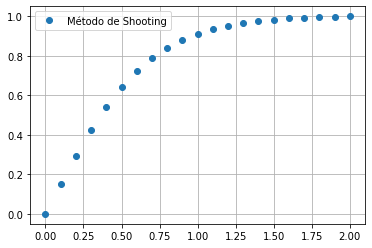

In [5]:
def F1(x,y):
  F = np.zeros(2)
  F[0] = y[1]
  F[1] = -3.0*y[0]*y[1]
  return F
x,xStop =0.0,2.0
h=0.1
u=Ridder(r,1.0,2.0)
X,Y=Run_Kut4(F1,x,initCond(u),xStop,h)
print("La solución es")
imprimeSol(X,Y,2)
plt.plot(X,Y[:,0],"o",label="Método de Shooting")
plt.legend()
plt.grid()
plt.show()